In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from dateutil.relativedelta import relativedelta

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
existing = automap_base()
# reflect the tables
existing.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
existing.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = existing.classes.measurement
Station = existing.classes.station

In [8]:
# Create our session (link) from Python to the DB
session_linked = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
Most_recent = session_linked.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(Most_recent)

('2017-08-23',)


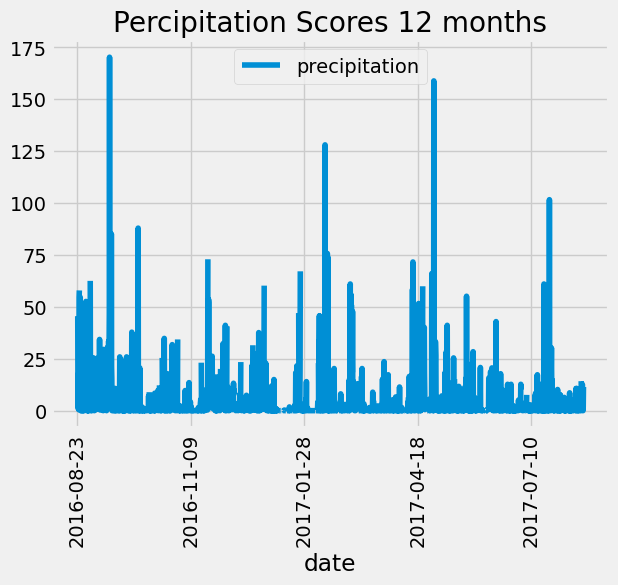

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_ago = dt.date(2017,8,23) - relativedelta(years=1)
# Perform a query to retrieve the data and precipitation scores
date_and_percip_scores = session_linked.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
date_and_percip_scores_df = pd.DataFrame(date_and_percip_scores , columns=['date','precipitation'])
date_and_percip_scores_df.set_index('date', inplace=True)
# Sort the dataframe by date
date_and_percip_scores_df = date_and_percip_scores_df.sort_index()
date_and_percip_scores_df.head()
# Use Pandas Plotting with Matplotlib to plot the data
date_and_percip_scores_df.plot()
plt.title("Percipitation Scores 12 months")
plt.xticks(rotation='vertical')
plt.show()

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
date_and_percip_scores_df.describe()

,precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
sum_stat = session_linked.query(Station.station).count()
print(sum_stat)

9


In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
from sqlalchemy import func, desc
most_active_stations = session_linked.query(Measurement.station,              
    func.count(Measurement.station).label('qty')
    ).group_by(Measurement.station
    ).order_by(desc('qty')).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [ ]:
#Station ID: 'USC00519281' has the greatest number of observations.

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session_linked.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()


[(12.2, 29.4, 22.03582251082252)]

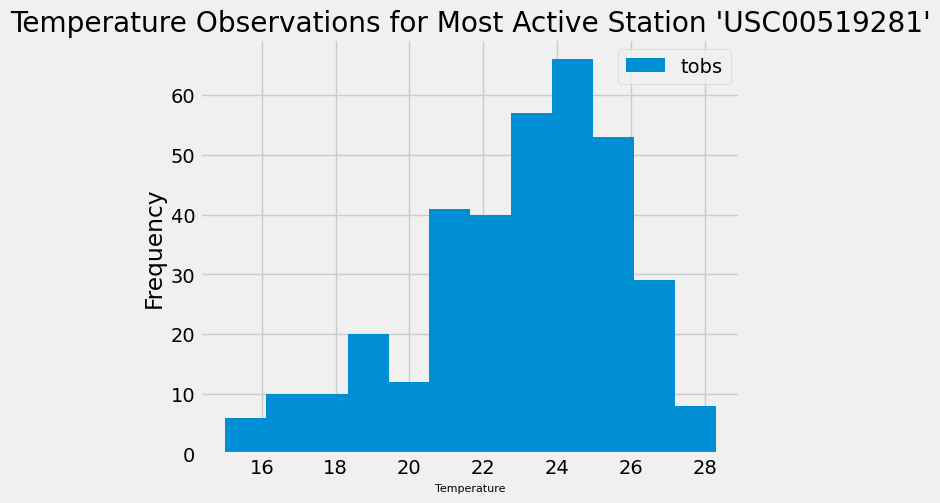

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_most_active_data = session_linked.query(Measurement.tobs).filter(Measurement.date >= one_year_ago, Measurement.station == 'USC00519281').all()
temp_most_active_data_df = pd.DataFrame(temp_most_active_data , columns=['tobs'])
temp_most_active_data_df.plot.hist( bins=12)
plt.tight_layout()
plt.title("Temperature Observations for Most Active Station 'USC00519281'")
plt.xlabel("Temperature", fontsize=8)
plt.show()

# Close session

In [17]:
# Close Session
session_linked.close()